### How to Plot Washouts and Undergauge Well Borehole from a Petro Wireline Log 

#### Motivation:
In a borehole, the diameter often deviates from the intended size created by the drilling bit. This is due to the presence of loose formations that erode, altering the well's shape at various depths, a phenomenon known as washout. Additionally, certain formations, like shale, can swell, resulting in an undergauge well profile in these areas.

In a standard wireline log, the difference between planned bitsize and actual well hole profile is highlight with different colors. This is very important to know what is the actual diamater against depth for several reasons:
- Log quality
- Planning next run conveyance method
- Cementing job
- Casing job
- Formation production quality

In [17]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading the dataset in to dataframe

In [18]:
df = pd.read_csv('../data/welldata.csv')
df.head()

,DEPT,CALI,SGR,CGR,THOR,URAN,POTA,ILD,ILM,SFLU,PEF,NPHI,RHOB
0,50.5,5.902,145.146,24.131,2.477,13.727,0.701,18.533,17.162,2000.000,3.938,0.098,2.120
1,51.0,5.895,150.785,28.006,2.884,13.927,0.811,19.029,19.305,1955.824,3.924,0.049,2.100
2,51.5,5.895,155.732,31.508,3.259,14.091,0.909,18.660,20.851,1955.826,3.861,0.049,2.084
3,52.0,5.895,154.033,30.359,3.149,14.028,0.874,17.425,21.394,1955.826,3.629,0.244,2.074
4,52.5,5.895,169.844,40.371,4.755,14.686,1.022,16.477,20.181,2000.001,3.658,3.467,2.064


Exploring data to see data quality if there are any nulls and what are the data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT    840 non-null    float64
 1   CALI    840 non-null    float64
 2   SGR     840 non-null    float64
 3   CGR     840 non-null    float64
 4   THOR    840 non-null    float64
 5   URAN    840 non-null    float64
 6   POTA    840 non-null    float64
 7   ILD     840 non-null    float64
 8   ILM     840 non-null    float64
 9   SFLU    840 non-null    float64
 10  PEF     840 non-null    float64
 11  NPHI    840 non-null    float64
 12  RHOB    840 non-null    float64
dtypes: float64(13)
memory usage: 85.4 KB


Bitsize in this section is 6in

In [20]:
#creating a new column named bitsize
df['bitsize'] = 6

Plotting the figure using matplotlib

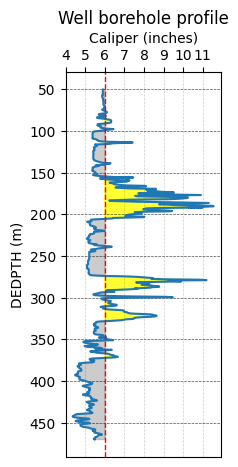

In [21]:
#first of all we get a figure object, which is like our canvas to paint on
fig = plt.figure(figsize=(2, 5)) #
plt.plot(df.CALI, df.DEPT) #1: first plot
plt.gca().invert_yaxis() # 2: invert

#move x axis on top
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

#grid
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='black', alpha=0.2)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='black', alpha=0.7)

#titles
plt.title('Well borehole profile')
plt.xlabel('Caliper (inches)')
plt.ylabel('DEDPTH (m)') 

#ticks
plt.xticks(np.arange(4, 14, 1))
plt.yticks(np.arange(0, 500, 50))

#add reference bitsize verticle line
plt.axvline(x=6, color='Red', linestyle='--', linewidth=1)

# fill  between
plt.fill_betweenx(df.DEPT, df.CALI, df.bitsize, where=(df.CALI > df.bitsize), color='Yellow', alpha=0.8)
plt.fill_betweenx(df.DEPT, df.CALI, df.bitsize, where=(df.CALI < df.bitsize), color='gray', alpha=0.4)


plt.show()